This notebook is written for a lecture titled **금속유동해석** given by Youngung Jeong at Department of Materials Science and Engineering, [Changwon National University](http://www.changwon.ac.kr).
This notebook is based on a scientific tool called [Jupyter notebook](http://jupyter-notebook.readthedocs.io/en/latest/notebook.html). This notebook is written in [Python](http://www.python.org).

- You will understand the difference between engineering and true strains and will find how they are correlated. 
- You will be also introduced how 'numerically' the true strain can be obtained, which essentially is based on the concept of engineering strain. 
- Through this example designed to learn the concept of strain, you'll also find how 'integration' can be 'numerically' obtained using a step-by-step basis.


해당 노트는 창원대학교 신소재공학부 **금속 유동 해석** 강의를 위해 쓰여졌습니다.

엔지니어링 변형률과 트루 변형률의 차이를 이해하며 그 둘이 어떻게 서로 관련되어있는지 이해하게 될 것입니다. 그리고 트루 변형률이 어떻게 '수치적'으로 계산이 되는지 알아보고, 또한 그 방법이 엔지니어링 변형률에 바탕을 두었다는 것을 알게 될 것입니다. 이를 보여주기 위해 어떻게 수치적으로 (numerically) 적분을 수행하고 계산할 수 있는지 Python script를 통해 알아볼 것입니다.

Contact info: [yjeong@changwon.ac.kr](mailto:yjeong@changwon.ac.kr)

기타 수업과 관련된 질문들은 되도록이면 와글의 커뮤니티를 사용하세요.

**Youngung Jeong**, PhD

Assistant professor at Department of Metallurgy and Materials Science and Engineering

Changwon National University

# Pylab environment
'pylab inline' gives an environment similar to [Matlab](https://www.mathworks.com/products/matlab.html). It imports various libraries including ([NumPy](http://www.numpy.org), [SciPy](http://www.scipy.org), and [matplotlib](http://matplotlib.org)). One can find more about thoses tools from the linked webpages.

아래의 **%pylab inline** 명령어는 순수한 Python 명령구문이 아니라, 해당 Notebook에서 다양한 library를 사용할 수 있도록 불러오며 또 그래프를 그릴 수 있게 해줍니다. Matlab과 비슷한 환경으로 마련해준다고 생각하면 쉽게 이해할 수 있을 것 같습니다.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Problem description
Let's assume that a rod-shaped sample that is initially 10 mm long.

The rod is tensiled along its longitudinal direction for 10 seconds.
After the tension, the tensile rod became 20 mm long. Let's say the initial and the final lengths are denoted as $l_0$ and $l_1$, respectively - see below line

$l_0=10$ and $l_1=20$

** Questions **
1. What is the engineering strain?
2. What is the true strain?
3. How would you quantify the "speed" of strain?
4. How would you make the test conducted under a **constant** speed of strain?

### Engineering strain
- Step 1: Assigning $l_0$, $l_1$ and $t$ for initial, final lengths of the rod, and the time elapsed during the deformation, respectively.

In [2]:
l0=10   # Assign the initial length to l0
l1=20   # Assign the final length to l1
time=10 # Elapsed time for the tensile deformation

- **Sanity check**: print the above variables to see if they were correctly *stored*.

In [3]:
print l0
print l1
print time

10
20
10


- Step 2: Let's calculate the engineering strain ($\epsilon$), which is defined as:

$\epsilon=\frac{l_1-l_0}{l_0}$

In [4]:
engi_strain = (l1-l0)/l0
print 'engineering strain:', engi_strain
print 'engineering strain [in percent]:', engi_strain*100, '[%]'

engineering strain: 1
engineering strain [in percent]: 100 [%]


- Discussion

## Deformation consisting of incremental changes

The deformation, during which the rod is elogated to 20 mm 'seemingly' at a constant speed, can be viewed as an incremental procedure. By an incremental procedure, I mean the process of deformation can be viewed as many steps along the time - it surely would require some time for you to stretch the rod, right?


As such, the whole deformation can be regarded as a procedure consisting of several 'time' steps.
Since we assumed that the deformation of our interest takes 10 seconds ($ t=10$ [sec]), the velocity of the one end of the rod can be naturally estimated through:

$v=(l_1-l_0)/t$

Thus, the velocity becomes:

In [5]:
time = 10
v=(l1-l0)/time
print 'velocity:', v, '[mm/s]'

velocity: 1 [mm/s]


**Discussion**

If we assume that this velocity remains constant, we can say that the rod was stretched at a constant speed, is that right? (fact-check)

## Let's plot (visualize) the change of length with respect to time.
 - Remember the speed ($v$) is assumed to remain constant
 - We will use a function 'plot'
 - Plot needs at least, two inputs: (x0,y0) and (x1,y1); x0 and x1 are initial and final times where y0 and y1 denote initial and final lengths of the rod, respectively.
 - We will use 'list' variable that has two elements. A list variable is usually constructed by a paired bracekts such as [1,2], which contains two elements, i.e., 1 and 2.

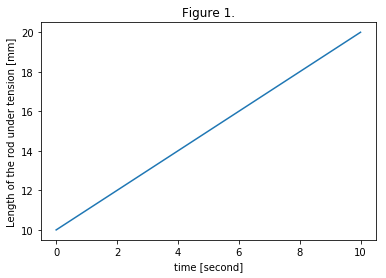

In [6]:
plot([0,time],[l0,l1])   ## Draw a line connecting two coordinates (0,l0) and (time,l1)

# Decorating the x and y labels attached to the horizontal and vertical axes
xlabel('time [second]')
ylabel('Length of the rod under tension [mm]')
title('Figure 1.')

Let's say we are interested in the change made within an time increment denoted as $dt$.
Likewise, the incremental length change (denoted as $dl$) is obtained by 

$dl = v \cdot dt$

If the lengthal change remains constant, v should be constant as well, i.e.,

$\frac{dl}{dt}=v=constant$

- Case with a single deformation step (the case for obtaining the engineering strain) - the reference length ($l_0$) is not updated.

In [7]:
step_numbers=10

time_stamps=np.linspace(0,10,step_numbers+1)
print time_stamps

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


- np.linspace generates a ndarray type variable with its elements filled by a set of numbers increasing from the given first value to the latter. 
np.linspace 펑션은 주어진 첫번째 값(start)과 두번째 값(stop) 사이의 숫자들을 element로 하는 ndarray 변수를 생성합니다. 이때, 만약 세번째 값 (num)이 주어지면, 세번째 값 (정수값) 만큼의 개수로 숫자를 같은 간격으로 생성합니다.

예를 들어,

np.linspace(0,1)

는 0과 1 사이에 (그들을 포함한) 숫자 50개를 생성합니다.

In [8]:
help(np.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

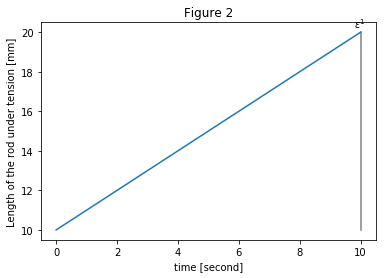

In [9]:
step_numbers=1

time_stamps=np.linspace(0,10,step_numbers+1)
for i in xrange(len(time_stamps)):
    l=l0+v*time_stamps[i]
    plot([time_stamps[i],time_stamps[i]],[l0,l],c='gray',ls='-')
    
    if i!=0:
        x=time_stamps[i]
        y=l0+x*v
        text(x-0.2,y+0.2,r'$\epsilon^{%i}$'%i)

plot([0,l0],[time,l1])
xlabel('time [second]')
ylabel('Length of the rod under tension [mm]')
title('Figure 2')

- Case with two deformation steps - the reference length ($l_0$) is updated just once.

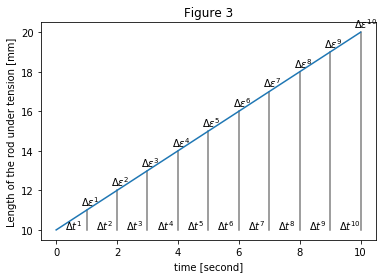

In [10]:
step_numbers=10

time_stamps=np.linspace(0,10,step_numbers+1)
current_time=0.
for i in xrange(len(time_stamps)):
    l=l0+v*time_stamps[i]
    plot([time_stamps[i],time_stamps[i]],[l0,l],c='gray',ls='-')
    
    if i!=0:
        x=time_stamps[i]
        y=l0+x*v
        text(x-0.2,y+0.2,r'$\Delta\epsilon^{%i}$'%i)
        text(x-0.7,l0,r'$\Delta t^{%i}$'%i)

plot([0,l0],[time,l1])
xlabel('time [second]')
ylabel('Length of the rod under tension [mm]')
title('Figure 3')

### Question 1.
How to define the engineering strain using a *step-by-step* basis over the course of entire deformation?

- Answer : using *step-by-step* **length** increment.

Let's define the strain increment corresponding to its time increment: 
$\Delta\epsilon^i = \frac{l^{i}-l^{(i-1)}}{l^{(i-1)}}$, where $i$ is an *index* that refers to the time step number. 
In that sense, $l^{i}$ refers to *i*-th time increment. Likewise, $l^{i-1}$ refers to *(i-1)*th time step. What is important to know is that this occurs within a particular time increment: $\Delta t^i$

### Question 2.
Maybe, the total amount of strain after the entire deformation can be obtained by summing all the strain increments collected at the time steps.

$\epsilon^\mathrm{total}=\Delta\epsilon^1+\Delta\epsilon^2+\Delta\epsilon^3 ... \Delta\epsilon^n$ , where the superscript denotes the corresponding time step.



With the summation symbol, it can be shortened to:

$\epsilon^\mathrm{total}=\sum_i^n {\Delta\epsilon^i}$

Let's use $\frac{l_1-l_0}{l_0}$ for strain for each time step ($dt$)

### We want to see how what we did in the above is affected by the number of steps considered on the step-by-step basis calculation.

To simplify this task, we might want to 'define' a function that is only sensitive to the number of 'inserted' time steps. For your understanding, let's understand the below cell line-by-line.

In [11]:
def numer_calc(step_number=10):
    """
    Numerically calculate the engineering strain
    
    Argument
    --------
    step_number: the number of steps used to obtain the step-wise increment of the entire deformation
    """
    time_stamps=np.linspace(0,10,step_number+1)
    
    ## initial states
    current_time=0.
    accumulative_strain=0.
    aeps=[]
    eps_increment=[]
    
    for i in xrange(len(time_stamps)):
        l=l0+v*time_stamps[i] ## the length of rod pertaining to current time_stamp

        if i!=0: # i=0 is the state without strain (so skipped)
            x = time_stamps[i]
            l_now = l0 + x*v   ## current length = l0 + time * v

            # engineering strain for this step
            x0 = time_stamps[i-1] ## time pertaining to 'previous' (or reference)
            l_last = l0+x0*v      ## the length of rod pertaining to the last step
            e_now = (l_now - l_last)/l_last ## step-wise strain increment following the definition of 'engineering' strain

            ## accumulative engineering strains
            accumulative_strain=accumulative_strain+e_now  ## summation of strain increments.
            aeps.append(accumulative_strain)
            eps_increment.append(e_now)
            
    ## returns time stamps, accumulative strains, and incremental strain (using the definition of engineering strain)
    return time_stamps, aeps, eps_increment

## test
#time_stamps, aeps,eps_increment = numer_calc(10)

** Hints** : Try to understand what are **returned** from the function numer_calc.

In below cell, an example is given to show you how the defined function **numer_calc** is used.

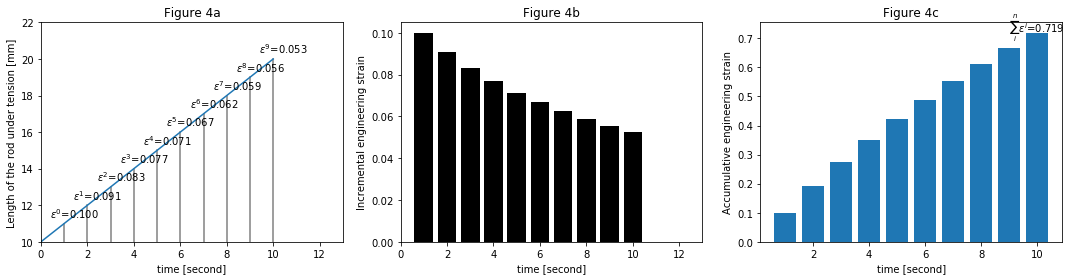

In [12]:
time_stamps, aeps, eps_increment = numer_calc(10)
         
### Decos (this block creates a few axes object from a figure object where you will plot three different graphs.)
fig=plt.figure(figsize=(15,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
### 

for i in xrange(len(time_stamps)-1):
    l=l0+v*time_stamps[i+1]
    ax1.plot([time_stamps[i+1],time_stamps[i+1]],[l0,l],c='gray',ls='-')
    x=time_stamps[i+1]
    y=eps_increment[i]
    ax1.text(x-0.6,l+0.3,r'$\epsilon^{%i}$=%.3f'%(i,y))
    ax2.bar(x,y,color='k')

ax1.plot([0,l0],[time,l1])
ax3.bar(time_stamps[1:],aeps)
ax3.text(time_stamps[-1],aeps[-1],r'$\sum_i^n \epsilon^i$=%.3f'%(aeps[-1]),ha='center')

## decorations
ax1.set_xlabel('time [second]')
ax1.set_ylabel('Length of the rod under tension [mm]')        
ax2.set_xlabel('time [second]')
ax3.set_xlabel('time [second]')
ax2.set_ylabel('Incremental engineering strain')
ax3.set_ylabel('Accumulative engineering strain')
ax1.set_xlim(0,13);ax1.set_ylim(10,22);
ax2.set_xlim(0,13)
ax1.set_title('Figure 4a')
ax2.set_title('Figure 4b')
ax3.set_title('Figure 4c')
tight_layout()

In [13]:
## remember the index -1 refers to the last element in the list.
print aeps[-1]

0.718771403175


- How to impose this increment by diving the summation for the infinite number of steps?
- Mathematicians dev
We all know the 'exact' solution (i.e., the analytical solution):

$\varepsilon=\ln{l_1}-\ln{l_0}$

This is actually derived from

$\int_{l_0}^{l_1} \frac{dl}{l}=\int_{l_0}^{l_1} d(\ln{l})=\ln{l_1}-\ln{l_0}$
- We can now **analytically** obtain true strain

In [14]:
# Note that <np.log> is the natural logarithmic function.
true_strain=np.log(l1)-np.log(l0)
print 'true_strain:',true_strain

true_strain: 0.69314718056


### Sanity check
$\ln(e)$ should be 1. where $e$ refers to the Euler's number (i.e., 2.7182818 ... )

In [15]:
# sanity check: 
print "Euler's number: ", np.e
print np.log(np.e), ': this value should be one'

Euler's number:  2.71828182846
1.0 : this value should be one


## Influence of the number of 'steps' used when you refine the problem to a process consisting of various steps
Let's graphically compare the analytical solution with the 'numerical' approach

0.695678809904


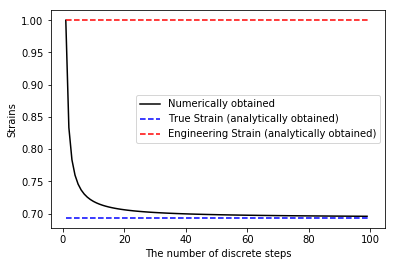

In [16]:
maxn=100 ## the maximum number of time steps to be considered
x=[]
y=[]
for i in xrange(1,maxn):
    time_stamps, aeps, eps_increment = numer_calc(i)
    x.append(i)
    y.append(aeps[-1]) ## adding the 'last' element in <aeps>, which was returned from <def numer_calc>

## Visualization
plot(x,y,'k-',label='Numerically obtained')
plot([1,maxn],[true_strain,true_strain],'b--',label='True Strain (analytically obtained)')
plot([1,maxn],[engi_strain,engi_strain],'r--',label='Engineering Strain (analytically obtained)')

xlabel('The number of discrete steps')
ylabel('Strains')
legend() ## put the legend box inside the figure
print aeps[-1]

## Assignment #1.
We talked about deformation and two different types of strain measures - 1) engineering strain and 2) true strains. We wondered how to properly *estimate* the 'speed' of deformation. One good excercise is to measure the velocity (which was defined as the length change with respect to time, i.e., $\frac{dl}{dt}$). One might also use a different measure for deformation "speed", which is called 'strain rate'. This is defined by the amount of applied strain and the elapsed time. Since we have shown that the true strain is closely related with engineering strain but differs when the number of 'discrete steps' is small - look at the figure - one can show that the engineering strain rate is getting closer to true strain rate as the time step size decreases. Note that the velocity remains constant $\frac{dl}{dt}$=1 [mm/s].

### Specific Tasks

#1-1. Plot a figure to show that engineering strain rate is varying with respect to time. Show that, for the given step number (n=10), the strain rate is 'decreasing' with respect to time. Note that the engineering strain is defined as $\dot{\epsilon}$ or more correctly $\Delta \epsilon ^i/ \Delta t^i$ when a finite value of incremental time is used, with the superscript $i$ being an index referring to the 'step' number in the time-stamp axis.
#1-2. Also, estimate the final strain rate towards the end of test (i.e., t=10 [sec]) and show the difference between the initial and the final strain rate.
#1-3. Show the dependence of the final strain rate with respect to the number of time steps by increasing n from 10 to 1000.
#1-4. Create the below figure, where the results similar to #1-3 is repeated in the four different combinations of 
 ($l_0, l_f, n$) values.
<img src='images/assignment_01-05.png'>
#1-5. Obtain the exact value of $\dot\epsilon$ at the end of deformation by obtaining the 'analytic' solution.